In [1]:
import keras

Using TensorFlow backend.


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [8]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 115s 10us/step


In [9]:
import numpy as np
from keras.utils import to_categorical

In [11]:
print('Training data shape : ',x_train.shape , y_train.shape)

print('Testing data shape : ', x_test.shape , y_test.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [13]:
classes = np.unique(y_train)
print('Output classes : ', classes)


Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'num 1 : 7')

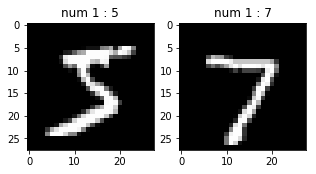

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("num 1 : {}".format(y_train[0]))
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("num 1 : {}".format(y_test[0]))

In [21]:
x_train= x_train.reshape(-1, 28,28, 1)
x_test= x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train= x_train/ 255.
x_test= x_test/ 255.
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('After conversion to one-hot encoding:', y_train_one_hot[0])



After conversion to one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_valid,train_label,valid_label = train_test_split(x_train,y_train_one_hot, test_size=0.2, random_state=13)

In [25]:
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [26]:
batch_size = 64
epochs = 20
num_classes = 10

In [27]:
number_model = Sequential()
number_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
number_model.add(LeakyReLU(alpha=0.1))
number_model.add(MaxPooling2D((2, 2),padding='same'))
number_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
number_model.add(LeakyReLU(alpha=0.1))
number_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
number_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
number_model.add(LeakyReLU(alpha=0.1))                  
number_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
number_model.add(Flatten())
number_model.add(Dense(128, activation='linear'))
number_model.add(LeakyReLU(alpha=0.1))                  
number_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
number_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
number_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [30]:
number_train = number_model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 110s 2ms/step - loss: 0.1635 - acc: 0.9489 - val_loss: 0.0601 - val_acc: 0.9805
Epoch 2/20
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0437 - acc: 0.9861 - val_loss: 0.0455 - val_acc: 0.9858
Epoch 3/20
48000/48000 [==============================] - 118s 2ms/step - loss: 0.0302 - acc: 0.9902 - val_loss: 0.0401 - val_acc: 0.9883
Epoch 4/20
48000/48000 [==============================] - 117s 2ms/step - loss: 0.0221 - acc: 0.9928 - val_loss: 0.0343 - val_acc: 0.9892
Epoch 5/20
48000/48000 [==============================] - 119s 2ms/step - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0393 - val_acc: 0.9894
Epoch 6/20
48000/48000 [==============================] - 121s 3ms/step - loss: 0.0142 - acc: 0.9953 - val_loss: 0.0383 - val_acc: 0.9906
Epoch 7/20
48000/48000 [==============================] - 114s 2ms/step - 

In [44]:
test_eval = number_model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.3868925983428957
Test accuracy: 0.1135


In [45]:
from keras.layers import Dropout

In [46]:
batch_size = 64
epochs = 20
num_classes = 10

In [47]:
number_model = Sequential()
number_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
number_model.add(LeakyReLU(alpha=0.1))
number_model.add(MaxPooling2D((2, 2),padding='same'))
number_model.add(Dropout(0.25))
number_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
number_model.add(LeakyReLU(alpha=0.1))
number_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
number_model.add(Dropout(0.25))
number_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
number_model.add(LeakyReLU(alpha=0.1))                  
number_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
number_model.add(Dropout(0.4))
number_model.add(Flatten())
number_model.add(Dense(128, activation='linear'))
number_model.add(LeakyReLU(alpha=0.1))           
number_model.add(Dropout(0.3))
number_model.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [48]:
number_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [49]:
number_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [51]:
number_train_dropout = number_model.fit(x_train , train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 110s 2ms/step - loss: 2.3019 - acc: 0.1111 - val_loss: 13.1969 - val_acc: 0.1008
Epoch 2/20
48000/48000 [==============================] - 114s 2ms/step - loss: 0.8396 - acc: 0.6992 - val_loss: 3.7692 - val_acc: 0.7641
Epoch 3/20
48000/48000 [==============================] - 117s 2ms/step - loss: 0.1682 - acc: 0.9469 - val_loss: 2.4375 - val_acc: 0.8465
Epoch 4/20
48000/48000 [==============================] - 118s 2ms/step - loss: 0.1216 - acc: 0.9618 - val_loss: 1.6205 - val_acc: 0.8973
Epoch 5/20
48000/48000 [==============================] - 120s 3ms/step - loss: 0.1000 - acc: 0.9681 - val_loss: 1.6700 - val_acc: 0.8945
Epoch 6/20
48000/48000 [==============================] - 121s 3ms/step - loss: 0.0865 - acc: 0.9743 - val_loss: 2.1824 - val_acc: 0.8630
Epoch 7/20
48000/48000 [==============================] - 126s 3ms/step - loss: 0.0770 - acc: 0.9761 - val_loss: 2.3080 -

In [53]:
test_eval = number_model.evaluate(x_test, y_test_one_hot, verbose=1)


10000/10000 [==============================] - 4s 421us/step


In [54]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.024877145380353977
Test accuracy: 0.991
